In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as optimize
import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
""" Optimization Algorithm """
""" New Matrix """
def newMat_2(x, Ut,Lt,Vt):
    l0,l1 = Lt[0], Lt[1]
    U_new = np.zeros((Ut.shape), dtype=np.cfloat)
    for i in range(Ut.shape[0]):
      U_new[i][0] = np.cos(x[i]) / l0
      U_new[i][1] = (np.sin(x[i]) / l1) * np.exp(1j*x[i+Ut.shape[0]])
    return np.dot(np.dot(U_new,np.diag(Lt)), Vt)


def newMat_3(x, Ut,Lt,Vt):
    l0,l1,l2 = Lt[0], Lt[1], Lt[2]
    U_new = np.zeros((Ut.shape), dtype=np.cfloat)
    for i in range(Ut.shape[0]):
      U_new[i][0] = np.cos(x[i]) / l0
      U_new[i][1] = (np.sin(x[i]) / l1) * (np.cos(x[i+Ut.shape[0]])) * np.exp(1j*x[i+2*Ut.shape[0]])
      U_new[i][2] = (np.sin(x[i]) / l2) * (np.sin(x[i+Ut.shape[0]])) * np.exp(1j*x[i+3*Ut.shape[0]])
    return np.dot(np.dot(U_new,np.diag(Lt)), Vt)


def newMat_4(x, Ut,Lt,Vt):
    l0,l1,l2,l3 = Lt[0], Lt[1], Lt[2], Lt[3]
    U_new = np.zeros((Ut.shape), dtype=np.cfloat)
    for i in range(Ut.shape[0]):
      U_new[i][0] = (np.cos(x[i]) / l0) * (np.cos(x[i+Ut.shape[0]]))
      U_new[i][1] = (np.cos(x[i]) / l1) * (np.sin(x[i+Ut.shape[0]])) * np.exp(1j*x[i+3*Ut.shape[0]])
      U_new[i][2] = (np.sin(x[i]) / l2) * (np.cos(x[i+2*Ut.shape[0]])) * np.exp(1j*x[i+4*Ut.shape[0]])
      U_new[i][3] = (np.sin(x[i]) / l3) * (np.sin(x[i+2*Ut.shape[0]])) * np.exp(1j*x[i+5*Ut.shape[0]])
    return np.dot(np.dot(U_new,np.diag(Lt)), Vt)

""" Cost Function """
def costFn(x, Ut,Lt,Vt,B,k):
    if k==2:
      Bp = newMat_2(x, Ut, Lt, Vt)
    elif k==3:
      Bp = newMat_3(x, Ut, Lt, Vt)
    elif k==4:
      Bp = newMat_4(x, Ut, Lt, Vt)
    else:
      return 0
    loss = np.linalg.norm(B**2 - np.abs(Bp)**2)
    return (loss)

In [ ]:
""" Calculating losses when k is in (2,3) and tol is in (1e-10, 1e-5, 1e-3)
a 3x3 matrix is used for experiment k=2 and tol in (1e-10, 1e-5, 1e-3)
a 4x4 matrix is used for the experiment k=3 and tol in (1e-10, 1e-5, 1e-3) """

res = np.zeros((600,4))
count = 0
for k in [2,3]:
    A = np.random.rand(k+1, k+1)
    for j in range(k+1): A[j] /= sum(A[j])
    B = np.sqrt(A)
    U, L, V = np.linalg.svd(B, full_matrices=False)
    initial_guess = np.ones((2*(k+1)*(k-1),), dtype=np.longdouble)
    Ut = U[:, :k]
    Vt = V[:k]
    Lt = L[:k]
    Bt = np.dot(np.dot(Ut,np.diag(Lt)), Vt)
    for tol in ([1e-10, 1e-5, 1e-3]):
        print('K= ', k, " Tol= ", tol)
        for i in range(100):
            if(i%10==0):
                print(i, " ", end='')
            result = optimize.minimize(fun=costFn, x0=initial_guess, args=(Ut,Lt,Vt,B,k),
                                            tol=tol, method='Nelder-Mead', options={'maxiter':1e+10})
            res[count][0] = k
            res[count][1] = tol
            res[count][2] = (np.linalg.norm(B**2 - Bt**2))
            res[count][3] = costFn(result.x,Ut,Lt,Vt,B,k)
            count+=1
        print('\n')

In [2]:
#np.save('toltest.npy',res)
res = np.load('toltest.npy')
res

array([[2.00000000e+00, 1.00000000e-10, 5.47269683e-02, 4.38971583e-02],
       [2.00000000e+00, 1.00000000e-10, 5.47269683e-02, 4.38971583e-02],
       [2.00000000e+00, 1.00000000e-10, 5.47269683e-02, 4.38971583e-02],
       ...,
       [3.00000000e+00, 1.00000000e-03, 1.40380399e-01, 2.19984105e-02],
       [3.00000000e+00, 1.00000000e-03, 1.40380399e-01, 2.19984105e-02],
       [3.00000000e+00, 1.00000000e-03, 1.40380399e-01, 2.19984105e-02]])

In [3]:
df = pd.DataFrame(res, columns=['k', 'tol', 'loss1', 'loss2'])
df['RI'] = (df['loss1']-df['loss2'])/df['loss1']
df.head()

,k,tol,loss1,loss2,RI
0,2.0,1.000000e-10,0.054727,0.043897,0.197888
1,2.0,1.000000e-10,0.054727,0.043897,0.197888
2,2.0,1.000000e-10,0.054727,0.043897,0.197888
3,2.0,1.000000e-10,0.054727,0.043897,0.197888
4,2.0,1.000000e-10,0.054727,0.043897,0.197888


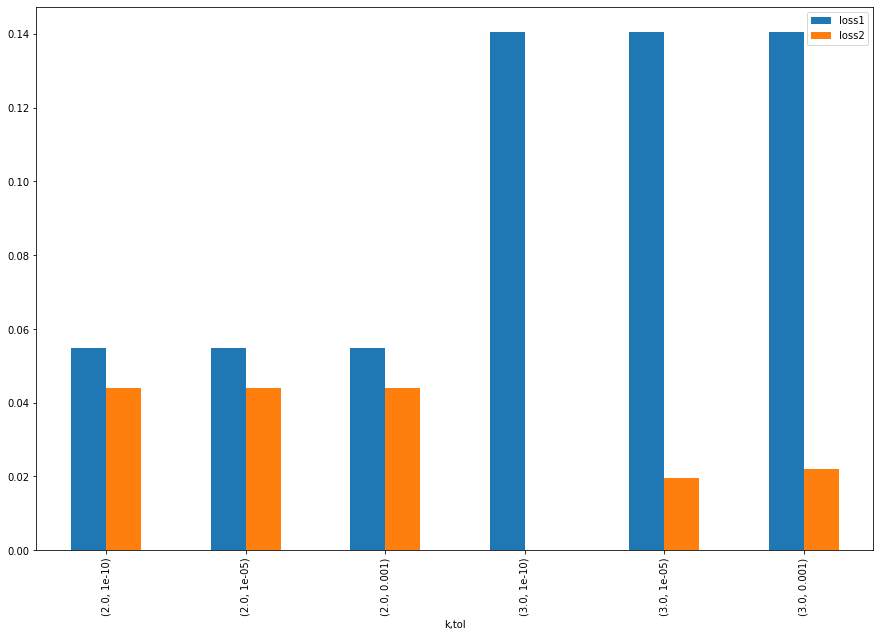

In [4]:
gdf = df.groupby(['k', 'tol']).mean()
ax = gdf[['loss1', 'loss2']].plot(figsize=(15,10), kind='bar')
plt.show()

In [5]:
gdf

loss1         loss2        RI
k   tol                                           
2.0 1.000000e-10  0.054727  4.389716e-02  0.197888
    1.000000e-05  0.054727  4.389716e-02  0.197888
    1.000000e-03  0.054727  4.389716e-02  0.197888
3.0 1.000000e-10  0.140380  3.455443e-12  1.000000
    1.000000e-05  0.140380  1.951749e-02  0.860967
    1.000000e-03  0.140380  2.199841e-02  0.843294